What impacts Apple Stock Price:
- "Inflation"
- "Interest Rates"
- "Apple Revenue"
- "Exchange Rate Fluctuations"
- "Previous Stock Price"



//- "Political Upheaval"
//- "Product Releases"


- "Good Apple News"
- "Bad Apple News"
- "Natural Calamities"


- "Stock Price"

# Overview
This notebook is used for the analysis portion of the project. 

Before analyzing our data, we had to first split it up into a test set and a training set which we did using the sklearn train test split function. We then had to split our data into predictive data and the feature set. The predictive data consists of the current stock price and the feature set consists of historical stock prices, current natural disasters, current currency exchange rates, and the current fed funds rate. Finally we had to reshape our data into a shape that would be accepted by the LSTM (3 dimensions).

In order to analyze our datasets and make a prediction we attempted to utilize a sequential LSTM model with 4 layers. In between each of the LSTM layers, we have a dropout layer that drops out a certain portion of the input units in order to prevent overfitting. Finally we have a dense layer with a single unit to produce the final output.  

Finally, we used the RSMProp optimizer in order to prevent overfitting and to help adapt the learning rate based on our model requirements. We used the mean squared error loss function because we wanted a continous output. We trained our data for 10 epochs, because we noticed that further training did not do much in terms of lowering the overall loss values. We then tested our data by comparing current stock prices to the predicted stock price outputted by the model. However, in this situation our model did not function as expected, meaning we were unable to create valid predictions.


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Import Training / Test Data

In [2]:
modelDf = pd.read_csv("finalDataFrame.csv")
modelDf.drop(columns="Unnamed: 0", inplace=True)
modelDf.drop(columns="Date", inplace=True)
train, test = train_test_split(modelDf, test_size=0.2)

In [3]:
yTrain = train.iloc[60:,:1]
yTest = test.iloc[60:,:1]
yTest = yTest.reset_index().drop(columns = "index")

In [4]:
scaler = MinMaxScaler(feature_range = (0,1))
trainingDataScaled = scaler.fit_transform(train)
testDataScaled = scaler.transform(test)

xTrain = []
xTest = []

for i in range(60, len(trainingDataScaled)):
    xTrain.append(trainingDataScaled[i-60:i, 1:4])
    
for i in range(60, len(testDataScaled)):
    xTest.append(testDataScaled[i-60:i, 1:4])

xTrain = np.array(xTrain)
xTest = np.array(xTest)
yTrain= np.array(yTrain)
yTrain.shape

(3798, 1)

In [5]:
xTrain = np.reshape(xTrain, (3798, 60, 3))
yTrain = np.reshape(yTrain, (3798, 1, 1))
xTest = np.reshape(xTest, (905, 60, 3))

In [6]:
# xTrain, yTrain = np.array(xTrain), np.array(yTrain)
# xTest = np.array(xTest)
# xTrain = np.reshape(xTrain, (3858, 1, 4))
# yTrain = np.reshape(yTrain, (3858, 1, 1))
# xTest = np.reshape(xTest, (965, 1, 4))

# Model Creation

In [7]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, 
                               input_shape=(60, 3)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10800     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

# Model Training

In [8]:
model.compile(optimizer="RMSprop", loss="mean_squared_error")

In [9]:
trainedModel = model.fit(xTrain, yTrain, epochs=10, batch_size=32)

Epoch 1/10
119/119 [==============================] - 42s 241ms/step - loss: 192.1911
Epoch 2/10
119/119 [==============================] - 31s 263ms/step - loss: 181.6447
Epoch 3/10
119/119 [==============================] - 32s 268ms/step - loss: 180.7691
Epoch 4/10
119/119 [==============================] - 27s 229ms/step - loss: 181.1024
Epoch 5/10
119/119 [==============================] - 30s 250ms/step - loss: 180.9209
Epoch 6/10
119/119 [==============================] - 32s 267ms/step - loss: 181.6784
Epoch 7/10
119/119 [==============================] - 32s 266ms/step - loss: 181.5254
Epoch 8/10
119/119 [==============================] - 33s 274ms/step - loss: 180.7435
Epoch 9/10
119/119 [==============================] - 29s 246ms/step - loss: 180.9065
Epoch 10/10
119/119 [==============================] - 31s 262ms/step - loss: 181.7894


# Model Evaluation / Testing / Plotting

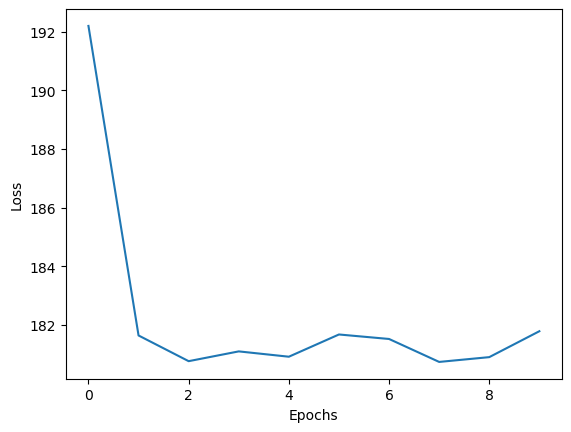

In [10]:
plt.plot(trainedModel.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [11]:
predictedStockPrice = model.predict(xTest)

29/29 [==============================] - 5s 64ms/step


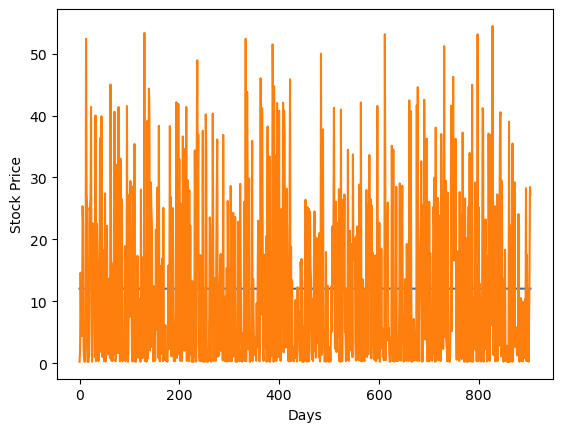

In [13]:
plt.plot(predictedStockPrice)
plt.plot(yTest)
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.show()

# Analysis Summary

Business Question: How does Apple Stock Price change in response to external and internal company factors?

Unfortunately, we were unable to fully answer our business question. This is because our model did not function as intended, meaning we were unable to find a correlation between the datasets entered and stock price. However, this is likely due to errors made on our end rather than the quality of data. Scaling the LSTM model proved to be a very difficult task and we were unable to figure out how to adjust the hyperparameters in a way that made our output feasible. However, with the proper adjustments we believe this data would show a correlation and could allow for some predictive capabilities. 

If our model were to have worked, we would have ideally compared it to the standard output created by simply inputting the historical stock price as a single feature. This comparison would have told us whether our remaining features increased the predictive power of our model or whether they worsened it. If they improved it, we could then use these features to help predict future stock prices. 

# Issues

During this project we ran into a number of issues. The first big issue was transforming the monthly federal funds rate data into daily data in order to fit the rest of our data sources. The second big issue was determing the proper shape for our input data as we were not entirely sure what it should be reshaped to. Finally we had to modify our model in order to take in several features and output a single answer. 